In [17]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)    # Data manipulate
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(ggplot2)       # Visualization
library(pROC)          # AUC, ROC
library(tree)          # CART model
library(randomForest)  # Bagging and RF
library(gbm)           # Boosting tree

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Loaded gbm 2.1.8



[1] "R version 4.0.5 (2021-03-31)"

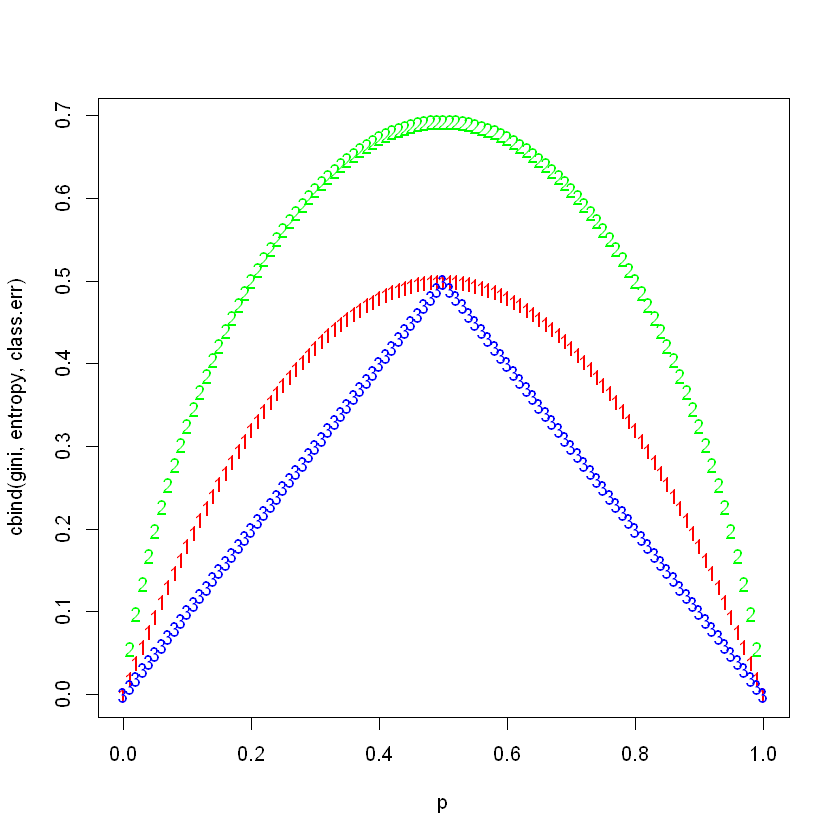

In [7]:
#Question 3

p = seq(0, 1, 0.01)
gini = p * (1 - p) * 2
entropy = -(p * log(p) + (1 - p) * log(1 - p))
class.err = 1 - pmax(p, 1 - p)
matplot(p, cbind(gini, entropy, class.err), col = c("red", "green", "blue"))

In [8]:
#Question 5

p = c(0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75)
#Majority approach
sum(p >= 0.5) > sum(p < 0.5)
#Average Approach
mean(p)

[1] TRUE

[1] 0.45

In [18]:
attach(Carseats)
#Question 8

#A
train = sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train = Carseats[train, ]
Carseats.test = Carseats[-train, ]

The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US




In [19]:
#B
tree.carseats = tree(Sales ~ ., data = Carseats.train)
summary(tree.carseats)


Regression tree:
tree(formula = Sales ~ ., data = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "Education"  
Number of terminal nodes:  17 
Residual mean deviance:  2.03 = 371.5 / 183 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.11000 -0.89170 -0.04892  0.00000  0.97080  4.18500 

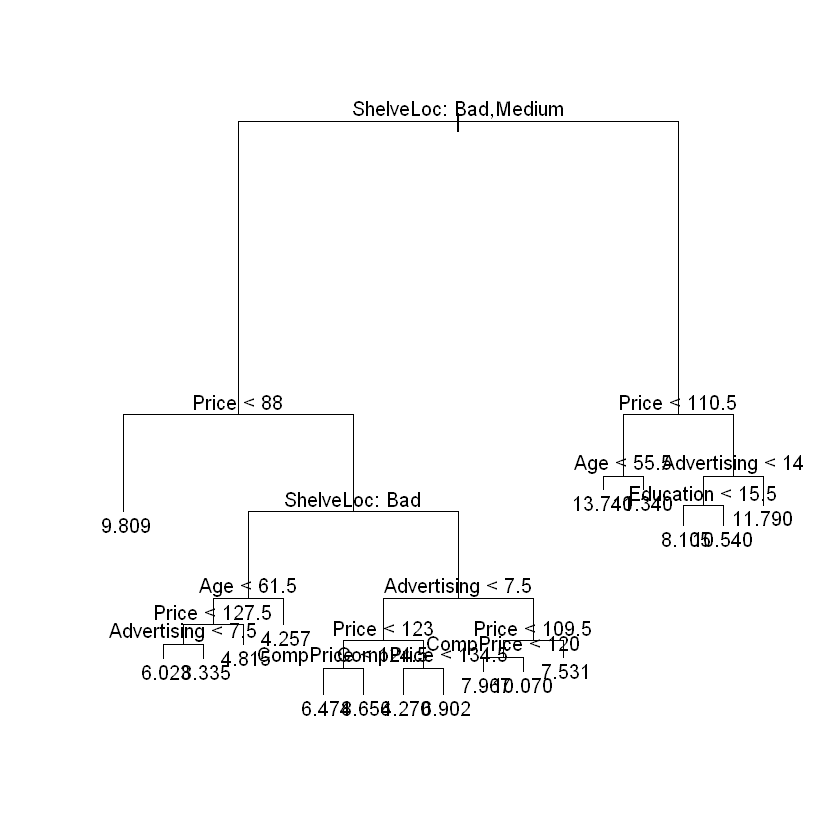

In [20]:
#C
plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [21]:
pred.carseats = predict(tree.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.carseats)^2)

[1] 4.506535

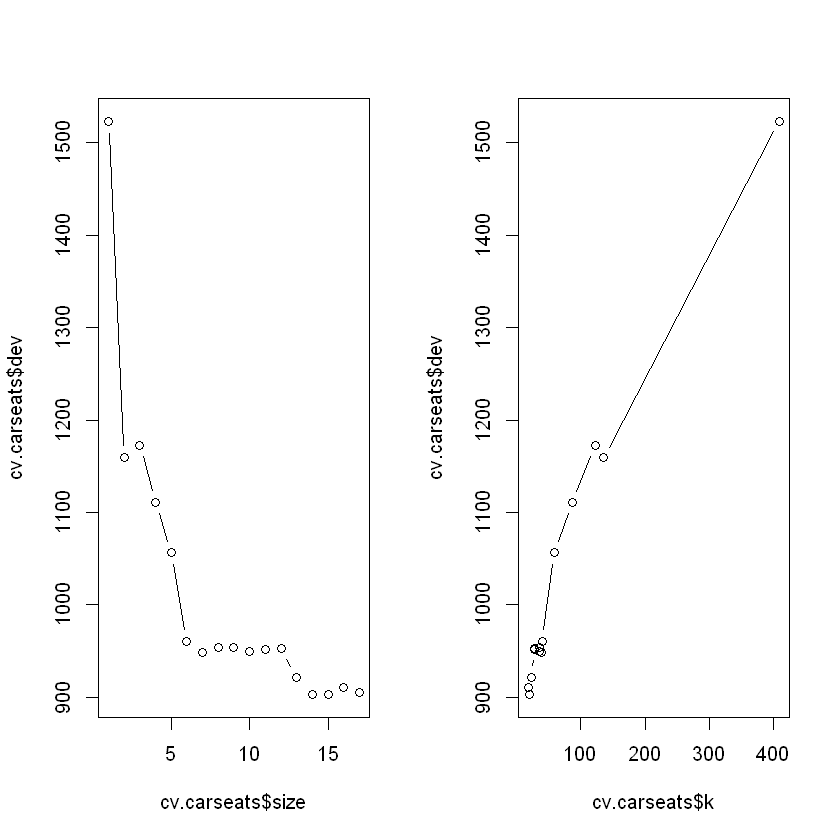

In [26]:
cv.carseats = cv.tree(tree.carseats, FUN = prune.tree)
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = "b")
plot(cv.carseats$k, cv.carseats$dev, type = "b")

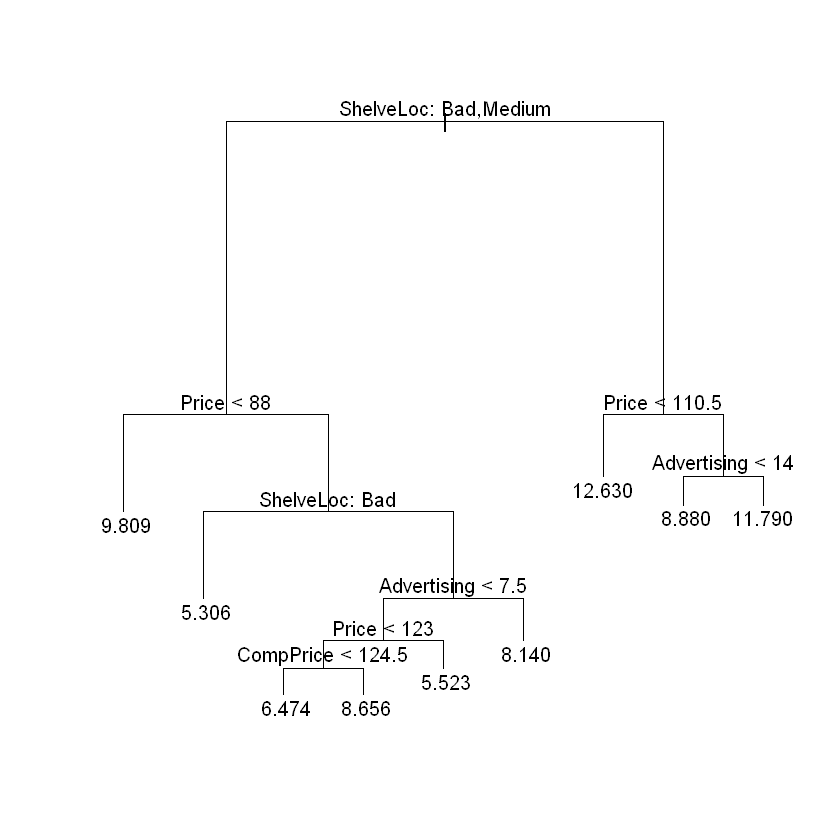

In [27]:

# Best size = 9
pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

In [28]:
pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

[1] 4.742501

In [29]:
#D
bag.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 10, ntree = 500, 
    importance = T)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)

[1] 2.681838

In [30]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,21.5119095,156.574976
Income,3.8102141,74.269358
Advertising,15.4499465,115.412289
Population,-2.6156591,45.562299
Price,47.3389212,368.573294
ShelveLoc,57.1185422,511.996576
Age,13.4486055,126.219222
Education,3.5650286,58.098664
Urban,0.1520352,11.027442
US,0.6031547,6.018593


In [31]:
#E
rf.carseats = randomForest(Sales ~ ., data = Carseats.train, mtry = 5, ntree = 500, 
    importance = T)
rf.pred = predict(rf.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)

[1] 2.921838

In [32]:
# Question 9
#A
attach(OJ)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

In [33]:
#B
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff" "PriceMM"  
Number of terminal nodes:  7 
Residual mean deviance:  0.77 = 610.6 / 793 
Misclassification error rate: 0.165 = 132 / 800 

In [34]:
#C
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1063.00 CH ( 0.62000 0.38000 )  
   2) LoyalCH < 0.5036 352  425.60 MM ( 0.29261 0.70739 )  
     4) LoyalCH < 0.275386 164  129.30 MM ( 0.13415 0.86585 ) *
     5) LoyalCH > 0.275386 188  257.00 MM ( 0.43085 0.56915 )  
      10) PriceDiff < 0.05 77   81.30 MM ( 0.22078 0.77922 ) *
      11) PriceDiff > 0.05 111  151.30 CH ( 0.57658 0.42342 ) *
   3) LoyalCH > 0.5036 448  333.70 CH ( 0.87723 0.12277 )  
     6) LoyalCH < 0.753545 179  201.90 CH ( 0.74860 0.25140 )  
      12) PriceDiff < -0.165 31   40.32 MM ( 0.35484 0.64516 ) *
      13) PriceDiff > -0.165 148  134.40 CH ( 0.83108 0.16892 )  
        26) PriceMM < 2.04 45   57.29 CH ( 0.66667 0.33333 ) *
        27) PriceMM > 2.04 103   65.64 CH ( 0.90291 0.09709 ) *
     7) LoyalCH > 0.753545 269   85.47 CH ( 0.96283 0.03717 ) *

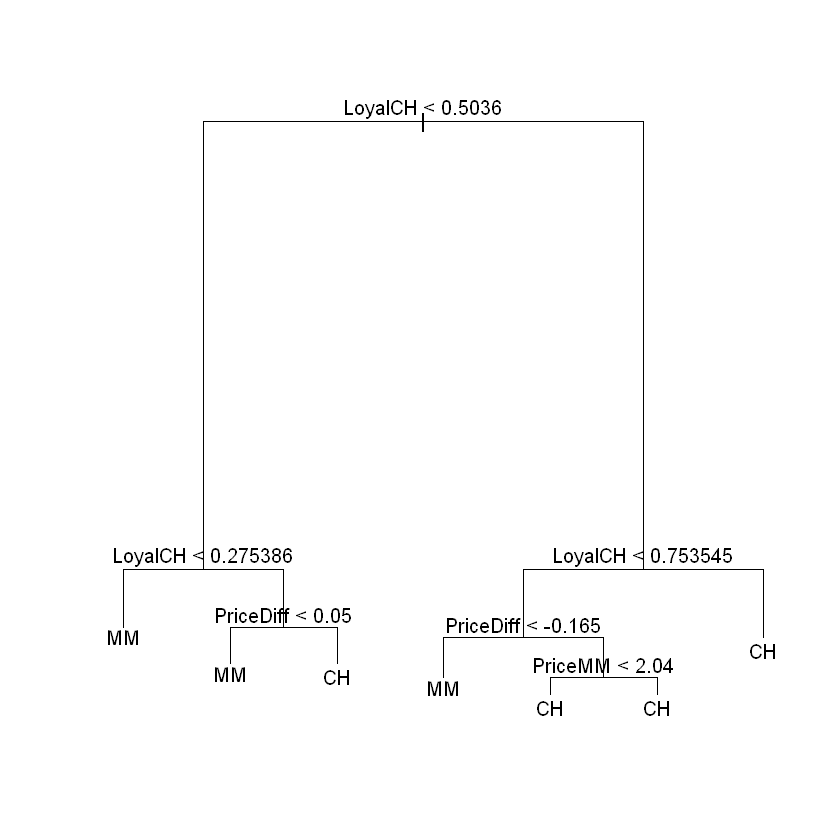

In [35]:
#D
plot(oj.tree)
text(oj.tree, pretty = 0)

In [36]:
#E
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 146  11
  MM  32  81

In [37]:
#F
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

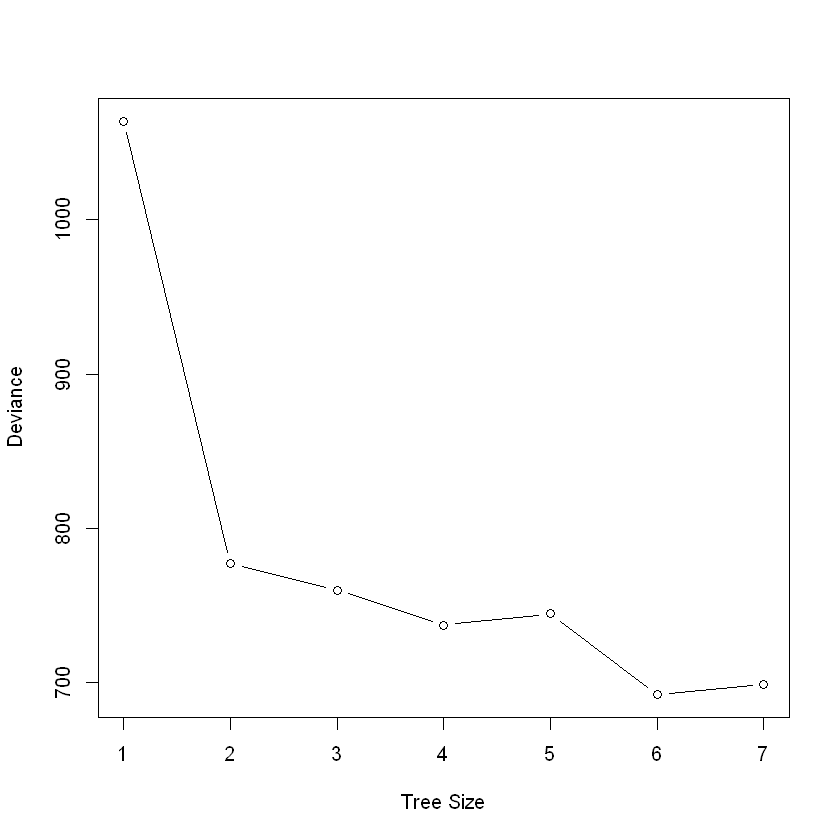

In [38]:
#G
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

In [ ]:
#H
Size of 6 gives lowest cross-validation error.

In [39]:
#I
oj.pruned = prune.tree(oj.tree, best = 6)

In [40]:
#J
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = 13L)
Variables actually used in tree construction:
[1] "LoyalCH"   "PriceDiff"
Number of terminal nodes:  6 
Residual mean deviance:  0.7835 = 622.1 / 794 
Misclassification error rate: 0.165 = 132 / 800 

In [41]:
#K
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1592593

In [42]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1592593